In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



**Data Exploration**

1. Load Data: Begin by loading your dataset into a pandas DataFrame to manipulate and analyze the data efficiently.
2. Initial Exploration: Use methods like head(), info(), and describe() to get an overview of the dataset, such as the number of entries, data types, and basic statistical details.
3. Check for Missing Values: Identify if there are any missing values in the dataset using isnull().sum().
4. Class Distribution: Check the balance between positive and negative reviews to see if the dataset is skewed using value_counts().
5. Review Length Analysis: Add a new column to your DataFrame that stores the length of each review. This can be done using len() function on the review text column. Analyze the distribution of review lengths to understand the data better.

In [5]:
datafile = pd.read_csv("data_imdb.csv")
datafile.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
datafile.describe()

,review,sentiment
count,50000,50000
unique,49581,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
datafile.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


**Data Cleaning and Text Preprocessing**

1. Remove Noise: Strip out unnecessary noise from the data like HTML tags, special characters, and numbers using regular expressions.

2. Tokenization: Split the text into individual words using tokenizers available in libraries like NLTK or spaCy.
Removing Stop Words: Filter out stop words (common words that may not be useful for the model) using NLTK's or spaCy's built-in stop word lists.

3. Stemming and Lemmatization: Reduce words to their root form. For example, "running" or "ran" becomes "run". You can use NLTK’s PorterStemmer or spaCy’s lemmatizer.

4. Vectorization (TF-Idatafile or Bag-of-Words): Convert text data into numerical vectors that machine learning models can understand. Use TfidatafileVectorizer or CountVectorizer from scikit-learn.

In [9]:
#Removing Noises
import re
def clean_text(text):
    # Remove special characters and numbers
      text = re.sub(r'<.*?>','',text)
      text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove leading and trailing spaces
      text = text.strip()
      return text

# appliying this clean text funciton on review column
datafile['review'] = datafile['review'].apply(clean_text)

In [10]:
datafile.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [11]:
#Tokenizing the file
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

datafile['review'] = datafile['review'].apply(word_tokenize)



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [12]:
# Removing stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]

datafile['filtered_tokens'] = datafile['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
datafile.head()

,review,sentiment,filtered_tokens
0,"[One, of, the, other, reviewers, has, mentione...",positive,"[One, reviewers, mentioned, watching, Oz, epis..."
1,"[A, wonderful, little, production, The, filmin...",positive,"[A, wonderful, little, production, The, filmin..."
2,"[I, thought, this, was, a, wonderful, way, to,...",positive,"[I, thought, wonderful, way, spend, time, hot,..."
3,"[Basically, theres, a, family, where, a, littl...",negative,"[Basically, theres, family, little, boy, Jake,..."
4,"[Petter, Matteis, Love, in, the, Time, of, Mon...",positive,"[Petter, Matteis, Love, Time, Money, visually,..."


In [14]:
# stemming and Lemmatization
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_word(tokens):
  return [stemmer.stem(word) for word in tokens ]

datafile['stemmed_token'] = datafile['filtered_tokens'].apply(stem_word)
datafile.head()

,review,sentiment,filtered_tokens,stemmed_token
0,"[One, of, the, other, reviewers, has, mentione...",positive,"[One, reviewers, mentioned, watching, Oz, epis...","[one, review, mention, watch, oz, episod, youl..."
1,"[A, wonderful, little, production, The, filmin...",positive,"[A, wonderful, little, production, The, filmin...","[a, wonder, littl, product, the, film, techniq..."
2,"[I, thought, this, was, a, wonderful, way, to,...",positive,"[I, thought, wonderful, way, spend, time, hot,...","[i, thought, wonder, way, spend, time, hot, su..."
3,"[Basically, theres, a, family, where, a, littl...",negative,"[Basically, theres, family, little, boy, Jake,...","[basic, there, famili, littl, boy, jake, think..."
4,"[Petter, Matteis, Love, in, the, Time, of, Mon...",positive,"[Petter, Matteis, Love, Time, Money, visually,...","[petter, mattei, love, time, money, visual, st..."


In [ ]:
#vectoriztion
from sklearn.feature_extraction.text import TfidatafileVectorizer

# Initialize the vectorizer
vectorizer = TfidatafileVectorizer(max_features=1000)  # Limit number of features to 1000 for example

# Fit and transform the text data
# This X can now be used as input for your machine learning models
X = vectorizer.fit_transform(datafile['review'].apply(lambda x: ' '.join(x)))



**Feature Engineering (optional in this step but critical overall)**

  You might create features like word count, character count, punctuation count, or the presence of certain words that could be indicative of sentiment.
  Use statistical techniques to analyze the importance and impact of these features on the sentiment classification.

In [20]:
# Word count
datafile['word_count'] = datafile['filtered_tokens'].apply(len)

# Character count
datafile['char_count'] = datafile['review'].apply(len)

# Average word length
datafile['avg_word_length'] = datafile['char_count'] / datafile['word_count']

datafile.head()


,review,sentiment,filtered_tokens,stemmed_token,word_count,char_count,avg_word_length
0,"[One, of, the, other, reviewers, has, mentione...",positive,"[One, reviewers, mentioned, watching, Oz, epis...","[one, review, mention, watch, oz, episod, youl...",178,300,1.685393
1,"[A, wonderful, little, production, The, filmin...",positive,"[A, wonderful, little, production, The, filmin...","[a, wonder, littl, product, the, film, techniq...",91,156,1.714286
2,"[I, thought, this, was, a, wonderful, way, to,...",positive,"[I, thought, wonderful, way, spend, time, hot,...","[i, thought, wonder, way, spend, time, hot, su...",91,161,1.769231
3,"[Basically, theres, a, family, where, a, littl...",negative,"[Basically, theres, family, little, boy, Jake,...","[basic, there, famili, littl, boy, jake, think...",70,128,1.828571
4,"[Petter, Matteis, Love, in, the, Time, of, Mon...",positive,"[Petter, Matteis, Love, Time, Money, visually,...","[petter, mattei, love, time, money, visual, st...",130,222,1.707692


In [17]:
from sklearn.model_selection import train_test_split

# Assume y is your label
y = datafile['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Model Evaluation***

Evaluating your model is crucial to understand its performance and where it might be lacking:

  1. Accuracy: Measures the overall correctness of the model.
  2. Precision, Recall, F1-Score: Helpful to see the balance between true positives and the errors made.
  3. Confusion Matrix: Provides insight into the types of errors made by the model.

Model Development
  Select Models ->
  For sentiment analysis, several models can perform well. We'll consider a variety of algorithms to see which works best:

  1. **Logistic Regression**: Good baseline for binary classification tasks.
  2. **Naive Bayes**: Often performs well in text classification.
  3. **Support Vector Machine (SVM)**: Effective in high-dimensional spaces like text data.
  4. **Random Forest**: Provides robustness due to its ensemble nature.
  5. **Neural Networks**: Advanced models like LSTM or simple feed-forward networks can be very effective if you have enough data and computational resources.

In [18]:
# Making the model on Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

[[4268  693]
 [ 618 4421]]


In [19]:
# Doing the same with SVM and Random Forest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate SVM and Random Forest
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4961
           1       0.83      0.83      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



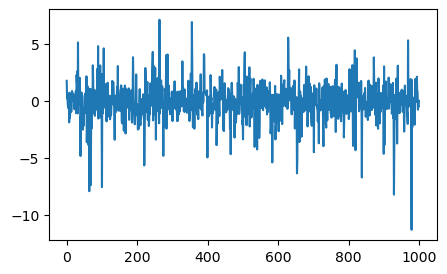

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(
    model.coef_[0],
    label='Logistic Regression'
)


**Video Explanation link:**
https://drive.google.com/file/d/1EmPCUi_fQAL1gu45W7RQzwr-MRWMpTzl/view?usp=sharing
